In [6]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# for upset plots
from itertools import combinations, chain
from upsetplot import from_memberships
from math import comb
import upsetplot


# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_3_sc/python_out/'

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

In [9]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]

metadata


,mice,species,sex,dataset
0,MMM1,MMus,male,M194
1,MMF2,MMus,female,M194
2,MMF3,MMus,female,M194
3,STM1,STeg,male,M194
4,STM2,STeg,male,M194
5,STF3,STeg,female,M194
6,MMM4,MMus,male,M220
7,MMF5,MMus,female,M220
8,STF4,STeg,female,M220
9,STM5,STeg,male,M220


In [10]:

# seperate it cells
omc_it = [df[df['type']=="IT"] for df in omc_type]

# seperate pt cells
omc_pt = [df[df['type']=="PT"] for df in omc_type]

## IT cells

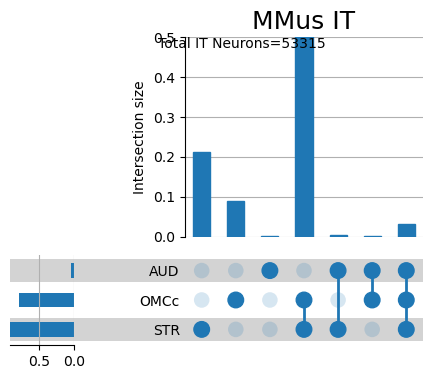

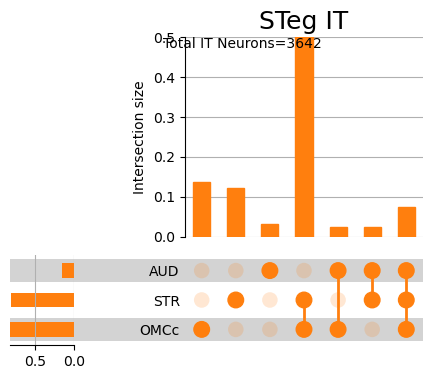

In [11]:
plot_areas = ["OMCc", "AUD", "STR"]


# plot mmus
mm_it = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "MMus":
        mm_it.append(omc_it[i])

mm_it_all = pd.concat(mm_it)

plot = df_to_motif_proportion(mm_it_all, areas=plot_areas, proportion=True)
upset_plot(plot, title="MMus IT", suptitle="Total IT Neurons="+str(mm_it_all.shape[0]))
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

# plot STeg
st_it = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        st_it.append(omc_it[i])

st_it_all = pd.concat(st_it)

plot = df_to_motif_proportion(st_it_all, areas=plot_areas, proportion=True)
upset_plot(plot, title="STeg IT", suptitle="Total IT Neurons="+str(st_it_all.shape[0]), facecolor="tab:orange")
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()



## IT + AMY


In [22]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df, it_areas=["OMCc", "AUD", "AMY", "STR"], 
                             pt_areas=["HY", "SNr", "SCm", "PG", "PAG", "BS"]) for df in omc_clean]


# seperate it cells
omc_it = [df[df['type']=="IT"] for df in omc_type]
omc_pt = [df[df['type']=="PT"] for df in omc_type]

print("Mouse","\t", "Amy IT cells", "\t", "AMY IT %",
      "\t\t", "Amy PT cells", "\t", "AMY PT %")

for i in range(num_samples):
    amy_it = omc_it[i].sum()["AMY"]
    amy_pt = omc_pt[i].sum()["AMY"]
    print(metadata.loc[i,"mice"], "\t", amy_it, "\t\t", amy_it/omc_it[0].shape[0]*100,
          "\t", amy_pt, "\t\t", amy_pt/omc_pt[0].shape[0]*100)

Mouse 	 Amy IT cells 	 AMY IT % 		 Amy PT cells 	 AMY PT %
MMM1 	 3.0 		 0.03618817852834741 	 101.0 		 7.709923664122137
MMF2 	 70.0 		 0.8443908323281062 	 20.0 		 1.5267175572519083
MMF3 	 43.0 		 0.5186972255729795 	 7.0 		 0.5343511450381679
STM1 	 21.0 		 0.25331724969843183 	 8.0 		 0.6106870229007634
STM2 	 5.0 		 0.060313630880579006 	 1.0 		 0.07633587786259542
STF3 	 2.0 		 0.024125452352231604 	 0.0 		 0.0
MMM4 	 324.0 		 3.90832328106152 	 159.0 		 12.137404580152673
MMF5 	 6.0 		 0.07237635705669482 	 1.0 		 0.07633587786259542
STF4 	 45.0 		 0.5428226779252111 	 65.0 		 4.961832061068702
STM5 	 1.0 		 0.012062726176115802 	 0.0 		 0.0
STF6 	 79.0 		 0.9529553679131484 	 48.0 		 3.6641221374045805
STM7 	 44.0 		 0.5307599517490953 	 120.0 		 9.16030534351145


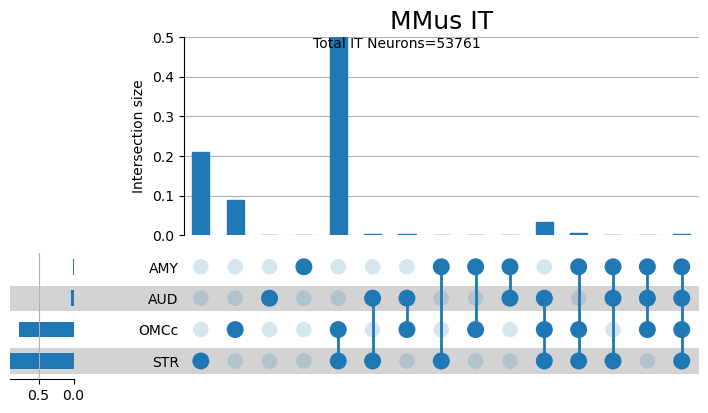

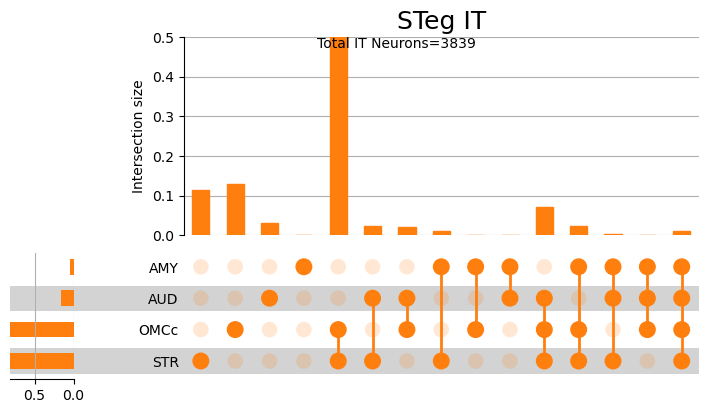

In [79]:
plot_areas = ["OMCc", "AUD", "AMY", "STR"]


# plot mmus
mm_it = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "MMus":
        mm_it.append(omc_it[i])

mm_it_all = pd.concat(mm_it)

plot = df_to_motif_proportion(mm_it_all, areas=plot_areas, proportion=True)
upset_plot(plot, title="MMus IT", suptitle="Total IT Neurons="+str(mm_it_all.shape[0]))
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

# plot STeg
st_it = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        st_it.append(omc_it[i])

st_it_all = pd.concat(st_it)

plot = df_to_motif_proportion(st_it_all, areas=plot_areas, proportion=True)
upset_plot(plot, title="STeg IT", suptitle="Total IT Neurons="+str(st_it_all.shape[0]), facecolor="tab:orange")
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()



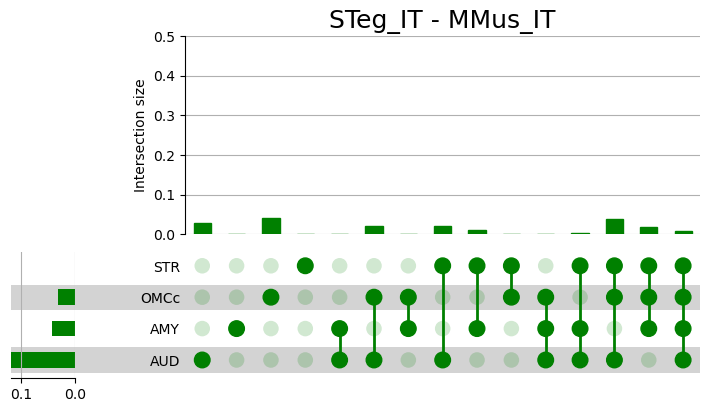

In [80]:
# plot differences in motifs b/w species
mm_motif_prop = df_to_motif_proportion(mm_it_all, areas=plot_areas, proportion=True)
st_motif_prop = df_to_motif_proportion(st_it_all, areas=plot_areas, proportion=True)

plot = st_motif_prop-mm_motif_prop
upset_plot(plot, title="STeg_IT - MMus_IT", facecolor="green")


In [81]:
print(mm_motif_prop)
print(mm_motif_prop[idx])


AMY    AUD    OMCc   STR  
False  False  True   False    0.088614
       True   False  False    0.000986
True   False  False  False    0.000074
False  False  False  True     0.211064
       True   True   False    0.002362
True   False  True   False    0.000019
False  False  True   True     0.653001
True   True   False  False    0.000019
False  True   False  True     0.003330
True   False  False  True     0.001079
       True   True   False    0.000000
False  True   True   True     0.032347
True   False  True   True     0.004613
       True   False  True     0.000242
              True   True     0.002251
dtype: float64


IndexError: positional indexers are out-of-bounds

In [ ]:
int(mm_it_all.sum()["AUD"])

2233

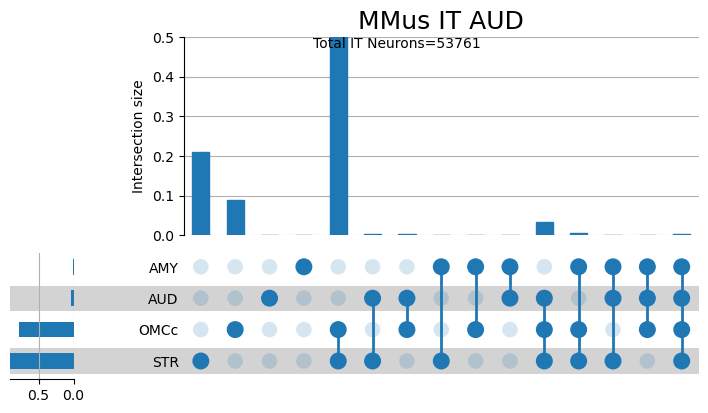

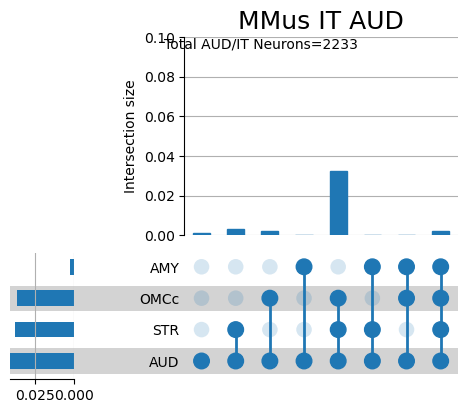

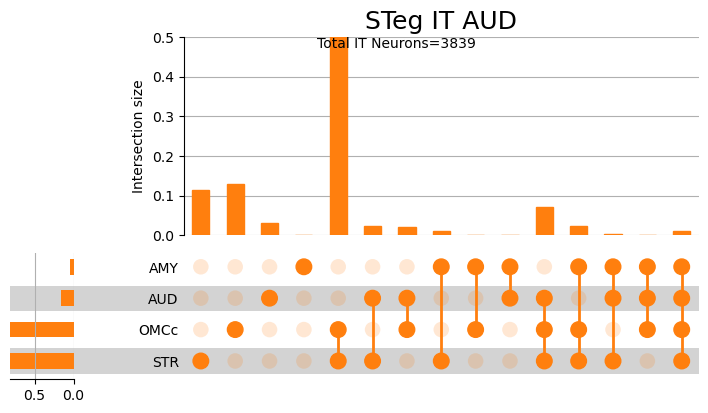

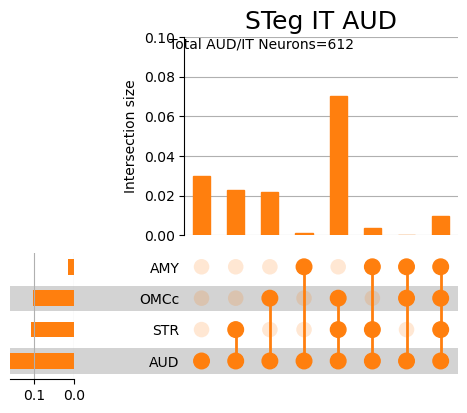

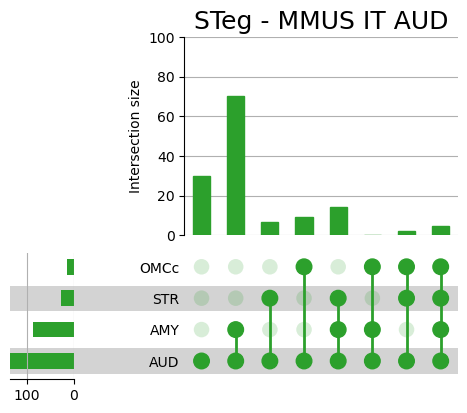

In [89]:
# plot motifs w/ AUD
mm_motif_prop = df_to_motif_proportion(mm_it_all, areas=plot_areas, proportion=True)
test = mm_motif_prop.index
idx = []
for i in range(test.shape[0]):
    if test[i][1] == True:
        idx.append(i)
mm_motif_prop[idx]

upset_plot(mm_motif_prop, title="MMus IT AUD", suptitle="Total IT Neurons="+str(mm_it_all.shape[0]))
plt.show()

upset_plot(mm_motif_prop[idx], title="MMus IT AUD", suptitle="Total AUD/IT Neurons="+str(int(mm_it_all.sum()["AUD"])),
           ymax=0.1)
plt.show()


# STeg
st_motif_prop = df_to_motif_proportion(st_it_all, areas=plot_areas, proportion=True)

# only keep motifs w/ aud
idx=[]
for i in range(test.shape[0]):
    if st_motif_prop.index[i][1] == True:
        idx.append(i)

upset_plot(st_motif_prop, title="STeg IT AUD", facecolor="tab:orange", suptitle="Total IT Neurons="+str(st_it_all.shape[0]))
plt.show()

upset_plot(st_motif_prop[idx], title="STeg IT AUD", suptitle="Total AUD/IT Neurons="+str(int(st_it_all.sum()["AUD"]))
           , facecolor="tab:orange", ymax=0.1)


plt.show()


sub = st_motif_prop/mm_motif_prop
idx=[]
for i in range(test.shape[0]):
    if sub.index[i][1] == True:
        idx.append(i)

upset_plot(sub[idx], title="STeg - MMUS IT AUD", facecolor="tab:green", ymin=0, ymax=100)
plt.show()


In [91]:
print(st_motif_prop)
print(mm_motif_prop)
print(st_motif_prop/mm_motif_prop)

AMY    AUD    OMCc   STR  
False  False  True   False    0.129982
       True   False  False    0.029695
True   False  False  False    0.001302
False  False  False  True     0.114874
       True   True   False    0.021881
True   False  True   False    0.000260
False  False  True   True     0.559000
True   True   False  False    0.001302
False  True   False  True     0.022923
True   False  False  True     0.011461
       True   True   False    0.000000
False  True   True   True     0.070331
True   False  True   True     0.023704
       True   False  True     0.003386
              True   True     0.009898
dtype: float64
AMY    AUD    OMCc   STR  
False  False  True   False    0.088614
       True   False  False    0.000986
True   False  False  False    0.000074
False  False  False  True     0.211064
       True   True   False    0.002362
True   False  True   False    0.000019
False  False  True   True     0.653001
True   True   False  False    0.000019
False  True   False  True     0.00

In [77]:
fc = st_motif_prop/mm_motif_prop
fc

BS     HY     PAG    PG     SCm    SNr  
True   False  False  False  False  False   NaN
False  False  False  False  False  True    NaN
                            True   False   NaN
                     True   False  False   NaN
       True   False  False  False  False   NaN
                                            ..
True   True   True   False  True   True    NaN
                     True   False  True    NaN
                            True   False   NaN
False  True   True   True   True   True    NaN
True   True   True   True   True   True    NaN
Length: 63, dtype: float64

# PT cells

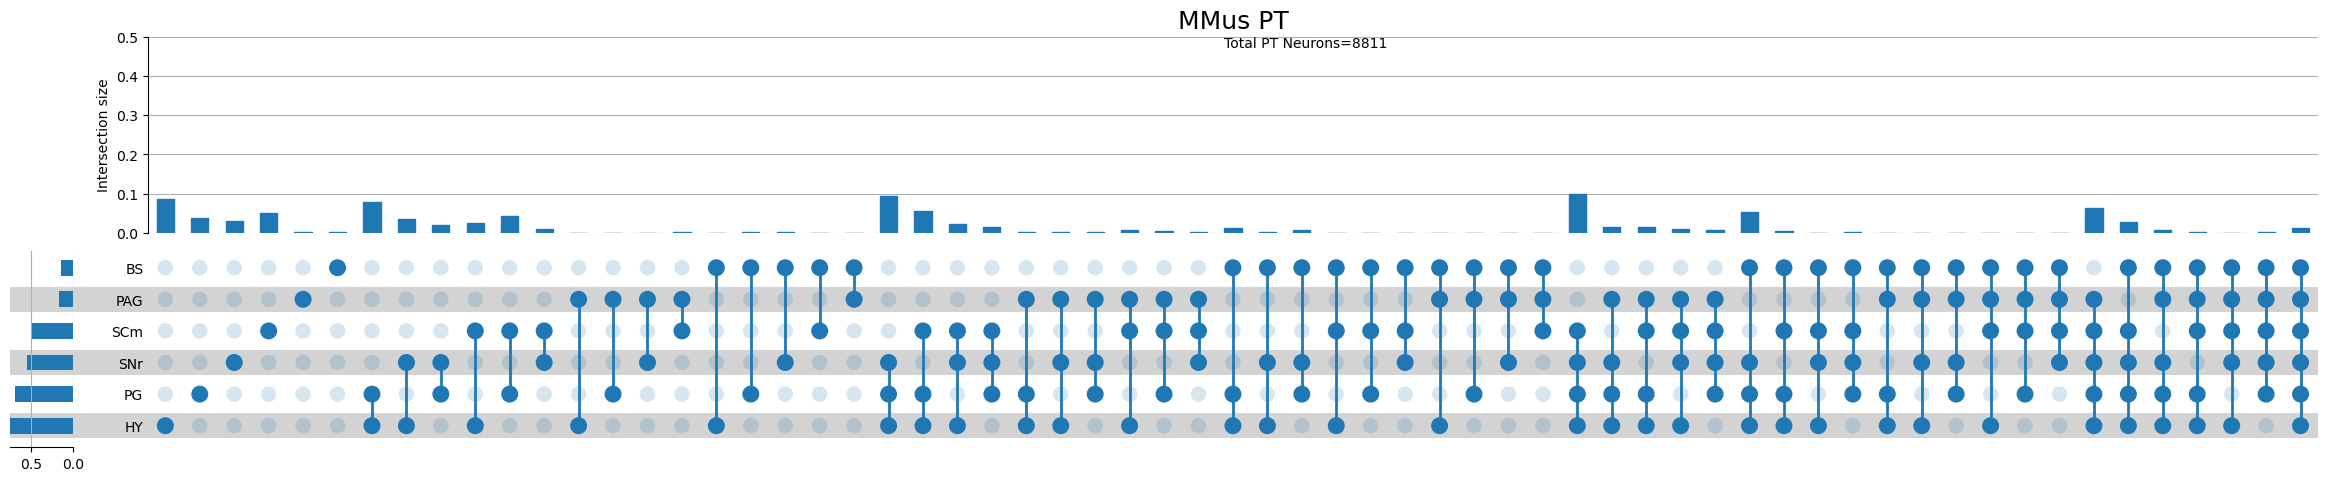

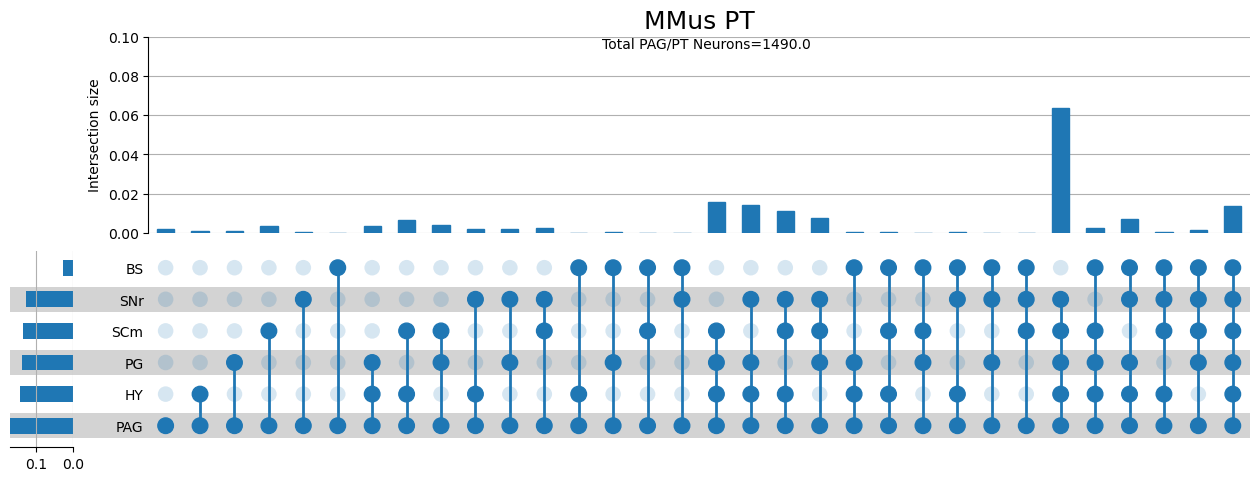

In [73]:
plot_areas = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]

# plot mmus
mm_pt = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "MMus":
        mm_pt.append(omc_pt[i])

mm_pt_all = pd.concat(mm_pt)

mm_pt_motif_prop = df_to_motif_proportion(mm_pt_all, areas=plot_areas, proportion=True)

mm_pag_idx = []
for i in range(mm_pt_motif_prop.shape[0]):
    if mm_pt_motif_prop.index[i][2] == True:
        mm_pag_idx.append(i)


upset_plot(mm_pt_motif_prop, title="MMus PT", suptitle="Total PT Neurons="+str(mm_pt_all.shape[0]))
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

upset_plot(mm_pt_motif_prop[mm_pag_idx], title="MMus PT", suptitle="Total PAG/PT Neurons="+str(mm_pt_all.sum()['PAG']),
           ymax=0.1)
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

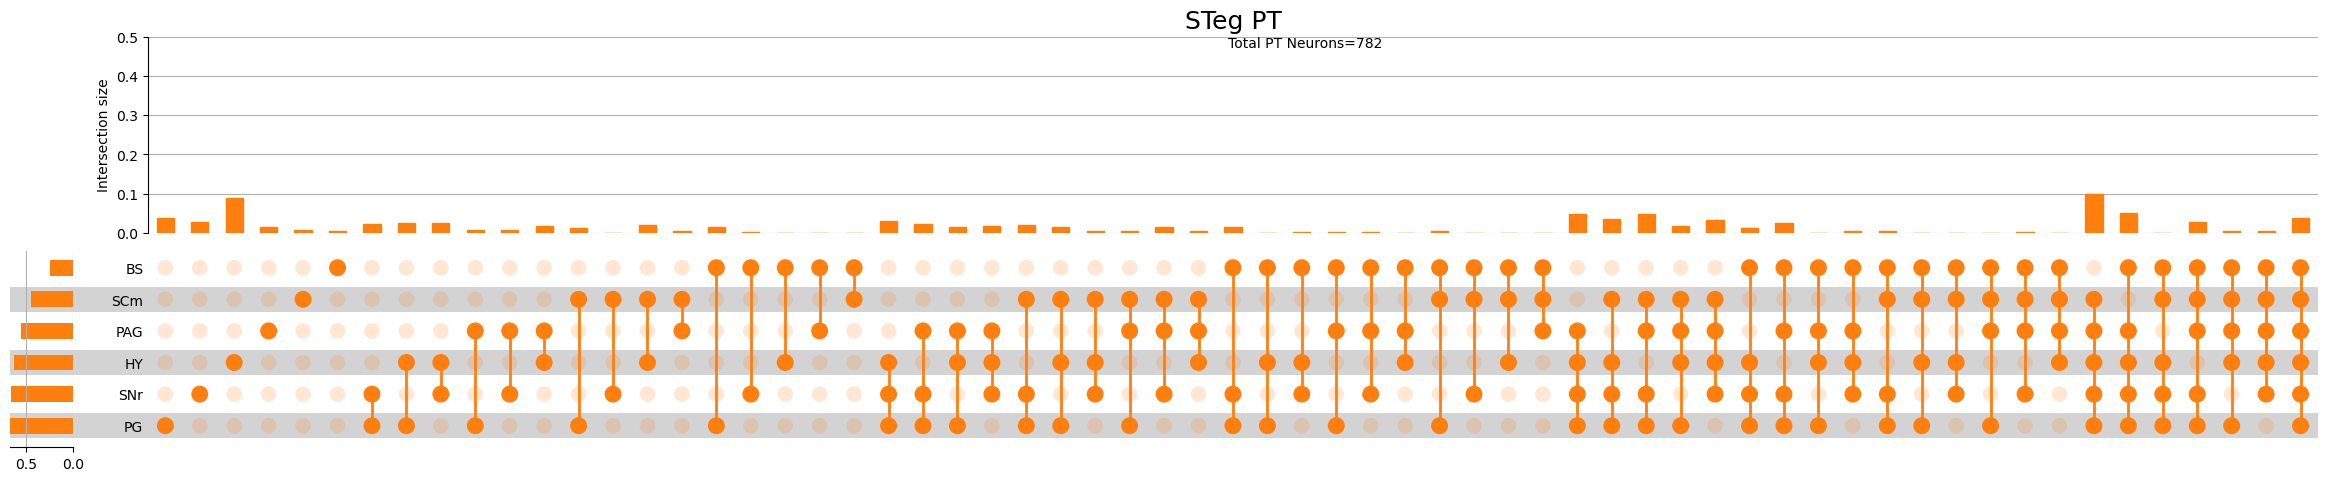

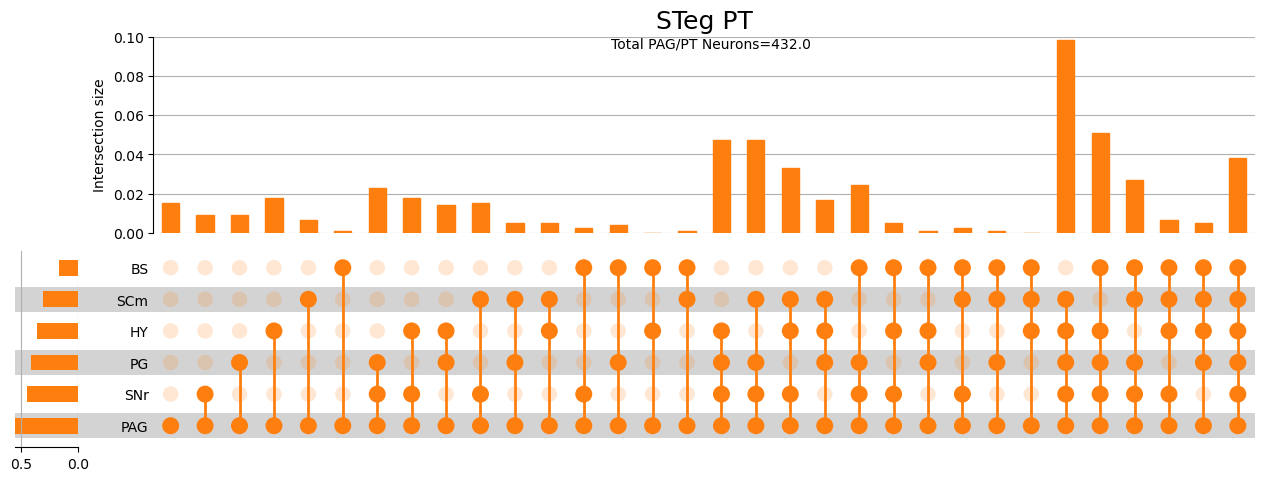

In [75]:
plot_areas = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]

# plot steg
st_pt = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        st_pt.append(omc_pt[i])

st_pt_all = pd.concat(st_pt)

st_pt_motif_prop = df_to_motif_proportion(st_pt_all, areas=plot_areas, proportion=True)

st_pag_idx = []
for i in range(st_pt_motif_prop.shape[0]):
    if st_pt_motif_prop.index[i][2] == True:
        st_pag_idx.append(i)


upset_plot(st_pt_motif_prop, title="STeg PT", suptitle="Total PT Neurons="+str(st_pt_all.shape[0]),
           facecolor="tab:orange")
# plt.suptitle("Total PAG Neurons="+str(mm_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

upset_plot(st_pt_motif_prop[st_pag_idx], title="STeg PT", suptitle="Total PAG/PT Neurons="+str(st_pt_all.sum()['PAG']),
           ymax=0.1, facecolor="tab:orange")
# plt.suptitle("Total PAG Neurons="+str(st_pag.shape[0]), x=0.56, y=0.88, fontsize=10)
plt.show()

# Volcano motif plot

In [175]:
st_pt_motif_prop = df_to_motif_proportion(st_pt_all, areas=plot_areas, proportion=True)

# calculate proportion for each area (sum/tot)
st_pt_prop = st_pt_all.sum()[plot_areas]/st_pt_all.shape[0]

# multiply by T/F where false --> 1???

st_pt_mult = [x * st_pt_prop for x in st_pt_motif_prop.index]
st_pt_mult = np.array(st_pt_mult)
st_pt_mult[st_pt_mult==0.0] = 1

exp = np.prod(st_pt_mult, axis=1)

# turn into data frame
end = pd.DataFrame()
end['obs'] = st_pt_motif_prop.values
end['exp'] = exp
end

,obs,exp
0,0.004367,0.208515
1,0.005459,0.459607
2,0.013100,0.471616
3,0.032751,0.568777
4,0.007642,0.382096
...,...,...
58,0.005459,0.00971
59,0.001092,0.01171
60,0.022926,0.012016
61,0.084061,0.026485


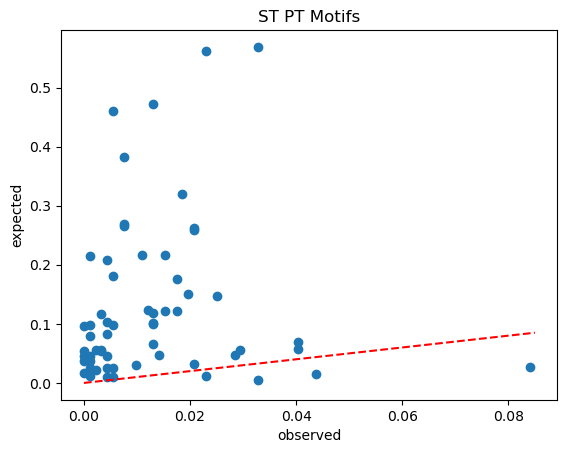

In [176]:
xy = np.linspace(0,0.085,5)
plt.scatter(end['obs'], end['exp'])
plt.plot(xy, xy, color='red', linestyle='--')
plt.xlabel("observed")
plt.ylabel("expected")
plt.title("ST PT Motifs")
plt.show()

In [179]:
# binomial test
import scipy.stats as stats

st_n = st_pt_all.shape[0]

# Define your observed and expected fractions as arrays
observed_fractions = end['obs']  # Replace with your observed fractions
expected_fractions = end['exp']   # Replace with your expected fractions

# Perform a binomial test for each pair of observed and expected fractions
p_values = [stats.binom_test(obs * st_n, n=st_n, p=exp) for obs, exp in zip(observed_fractions, expected_fractions)]

# Apply Bonferroni correction to the p-values
alpha = 0.05  # Set your desired significance level
bonferroni_corrected = alpha / len(p_values)

# Check if any p-value is less than the Bonferroni corrected threshold
significant_results = [p < bonferroni_corrected for p in p_values]

# Print the original p-values and significant results
print("Original p-values:", p_values)
print("Bonferroni corrected threshold:", bonferroni_corrected)
print("Significant results:", significant_results)


end['log2_fc'] = [np.log2(o/e) for o, e in zip(end['obs'], end['exp'])]
end['p_value'] = p_values
end['nlog10_p'] = np.log10(end['p_value']+0.0001)*-1

# add labels
pt_tf = st_pt_motif_prop.index.values

labels = st_pt_motif_prop.index.names

fin_labels = []
for i in range(len(pt_tf)):
    result = [t * a for t, a in zip(pt_tf[i], labels)]
    fin_labels.append(result)

end['labels'] = fin_labels
end
end


Original p-values: [1.9515777610864687e-85, 3.8172488264539554e-233, 3.559810331272916e-228, 0.0, 1.5501302840314004e-176, 0.0, 1.979413114662234e-40, 1.3080930998220143e-39, 2.7190389810154893e-34, 1.3218431525280993e-31, 1.6995505329403105e-44, 6.01813700344484e-75, 1.6114324575631868e-90, 6.816544107143332e-54, 5.256274329902896e-89, 9.490386349386881e-111, 5.88431502249643e-70, 4.275308260702073e-109, 1.5472320035606115e-80, 1.4539097723122231e-123, 3.2127408580543354e-94, 8.138809660652918e-19, 1.2103724374879487e-22, 3.582339221003222e-15, 4.361485437168818e-18, 6.205558420539985e-19, 4.565152167787094e-14, 7.484962671135108e-20, 1.2244383849323967e-13, 9.090052622814932e-15, 6.39998804892588e-17, 2.947379100875489e-37, 1.3379797786743656e-28, 1.0640635717703864e-33, 6.47948981985874e-27, 1.390247905721609e-35, 9.089339976453903e-34, 8.53580794649022e-37, 1.368151264672538e-41, 2.0023230464571227e-27, 6.260395749748218e-32, 1.899738627751486e-09, 2.967686038281694e-07, 1.61514682

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_93311/3208593839.py:26: RuntimeWarning:

divide by zero encountered in log2



,obs,exp,log2_fc,p_value,nlog10_p,labels
0,0.004367,0.208515,-5.577429,1.951578e-85,4.000000,"[BS, , , , , ]"
1,0.005459,0.459607,-6.395748,3.817249e-233,4.000000,"[, HY, , , , ]"
2,0.013100,0.471616,-5.169925,3.559810e-228,4.000000,"[, , PAG, , , ]"
3,0.032751,0.568777,-4.118249,0.000000e+00,4.000000,"[, , , PG, , ]"
4,0.007642,0.382096,-5.643856,1.550130e-176,4.000000,"[, , , , SCm, ]"
...,...,...,...,...,...,...
58,0.005459,0.00971,-0.830889,2.366602e-01,0.625691,"[BS, HY, PAG, , SCm, SNr]"
59,0.001092,0.01171,-3.423069,5.419147e-04,3.192523,"[BS, HY, , PG, SCm, SNr]"
60,0.022926,0.012016,0.932037,5.603903e-03,2.243828,"[BS, , PAG, PG, SCm, SNr]"
61,0.084061,0.026485,1.666258,2.608292e-18,4.000000,"[, HY, PAG, PG, SCm, SNr]"


<AxesSubplot: title={'center': 'ST PT'}, xlabel='log2(fold change)', ylabel='-log10(p-value)'>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/matplotlib/transforms.py:365: RuntimeWarning:

invalid value encountered in double_scalars

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


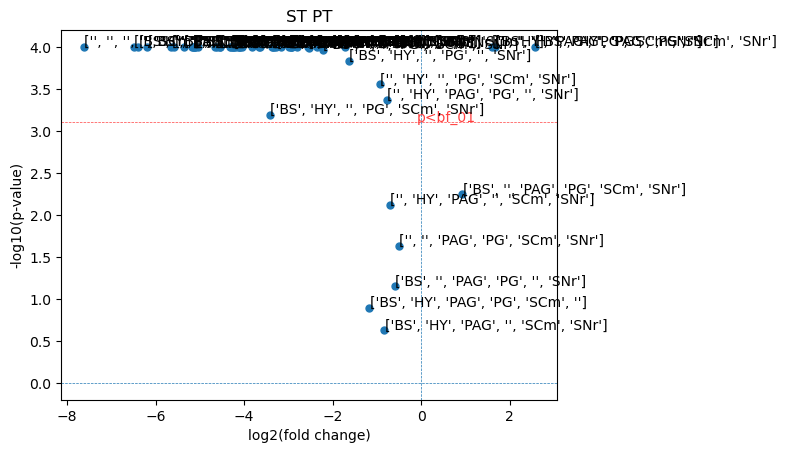

In [180]:
proportion_volcano_plot(end, title="ST PT", labels="labels", p_bf=bonferroni_corrected, p_05=False, p_01=False)

In [155]:


it_plot_areas = ["OMCc", "AUD", "STR"]

st_it_motif_prop = df_to_motif_proportion(st_it_all, areas=it_plot_areas, proportion=True)


# calculate proportion for each area (sum/tot)
st_it_prop = st_it_all.sum()[it_plot_areas]/st_it_all.shape[0]

# multiply by T/F where false --> 1???

st_it_mult = [x * st_it_prop for x in st_it_motif_prop.index]


st_it_mult = np.array(st_it_mult)
st_it_mult[st_it_mult==0.0] = 1

exp = np.prod(st_it_mult, axis=1)

# turn into data frame
end = pd.DataFrame()
end['obs'] = st_it_motif_prop.values
end['exp'] = exp

# add area labels to dataframe:

it_tf = st_it_motif_prop.index.values

labels = st_it_motif_prop.index.names

fin_labels = []
for i in range(len(it_tf)):
    result = [t * a for t, a in zip(it_tf[i], labels)]
    fin_labels.append(result)

end['labels'] = fin_labels
end


,obs,exp,labels
0,0.135967,0.152044,"[, OMCc, ]"
1,0.031335,0.817166,"[AUD, , ]"
2,0.126975,0.809537,"[, , STR]"
3,0.022888,0.124245,"[AUD, OMCc, ]"
4,0.584741,0.123085,"[, OMCc, STR]"
5,0.024251,0.661526,"[AUD, , STR]"
6,0.073569,0.100581,"[AUD, OMCc, STR]"


In [173]:
# binomial test
import scipy.stats as stats

st_n = st_it_all.shape[0]

# Define your observed and expected fractions as arrays
observed_fractions = end['obs']  # Replace with your observed fractions
expected_fractions = end['exp']   # Replace with your expected fractions

# Perform a binomial test for each pair of observed and expected fractions
p_values = [stats.binom_test(obs * st_n, n=st_n, p=exp) for obs, exp in zip(observed_fractions, expected_fractions)]

# Apply Bonferroni correction to the p-values
alpha = 0.01  # Set your desired significance level
bonferroni_corrected = alpha / len(p_values)

# Check if any p-value is less than the Bonferroni corrected threshold
significant_results = [p < bonferroni_corrected for p in p_values]

# Print the original p-values and significant results
print("Original p-values:", p_values)
print("Bonferroni corrected threshold:", bonferroni_corrected)
print("Significant results:", significant_results)


end['log2_fc'] = [np.log2(o/e) for o, e in zip(end['obs'], end['exp'])]
end['p_value'] = p_values
end['nlog10_p'] = np.log10(end['p_value']+0.0001)*-1
end



Original p-values: [0.006226404120237188, 0.0, 0.0, 1.6460232892866766e-110, 0.0, 0.0, 1.5088070830393566e-08]
Bonferroni corrected threshold: 0.0014285714285714286
Significant results: [False, True, True, True, True, True, True]


,obs,exp,labels,log2_fc,p_value,nlog10_p
0,0.135967,0.152044,"[, OMCc, ]",-0.161225,6.226404e-03,2.198843
1,0.031335,0.817166,"[AUD, , ]",-4.704776,0.000000e+00,4.000000
2,0.126975,0.809537,"[, , STR]",-2.672547,0.000000e+00,4.000000
3,0.022888,0.124245,"[AUD, OMCc, ]",-2.440505,1.646023e-110,4.000000
4,0.584741,0.123085,"[, OMCc, STR]",2.248145,0.000000e+00,4.000000
5,0.024251,0.661526,"[AUD, , STR]",-4.769701,0.000000e+00,4.000000
6,0.073569,0.100581,"[AUD, OMCc, STR]",-0.451176,1.508807e-08,3.999934


<AxesSubplot: title={'center': 'ST IT'}, xlabel='log2(fold change)', ylabel='-log10(p-value)'>

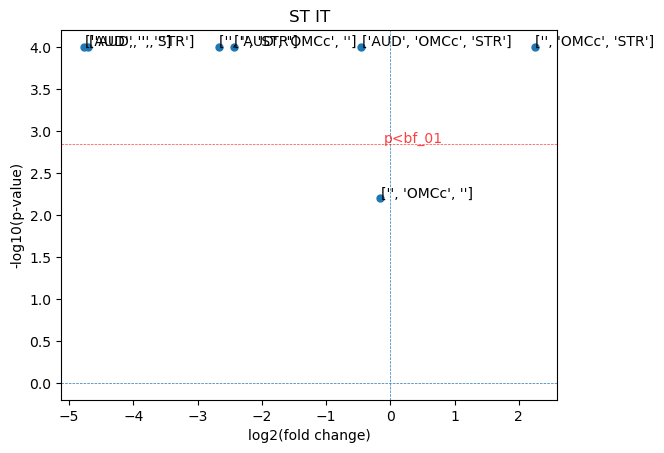

In [174]:
proportion_volcano_plot(end, title="ST IT", labels="labels", p_bf=bonferroni_corrected, p_05=False, p_01=False)

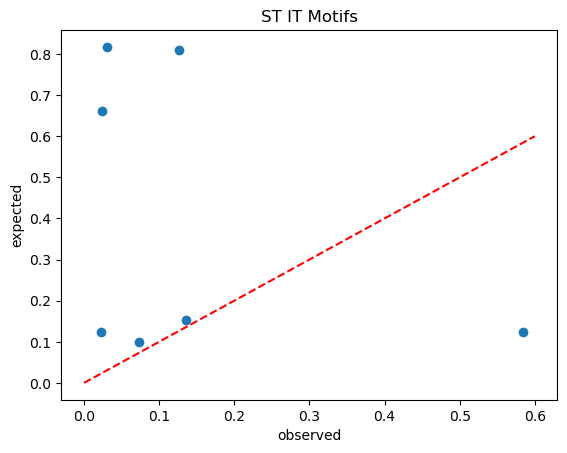

Original p-values: [0.006226404120237188, 0.0, 0.0, 1.6460232892866766e-110, 0.0, 0.0, 1.5088070830393566e-08]
Bonferroni corrected threshold: 0.0071428571428571435
Significant results: [True, True, True, True, True, True, True]


In [108]:

xy = np.linspace(0,0.6,5)
plt.scatter(end['obs'], end['exp'])
plt.plot(xy, xy, color='red', linestyle='--')
plt.xlabel("observed")
plt.ylabel("expected")
plt.title("ST IT Motifs")
plt.show()
# binomial test
import scipy.stats as stats

st_n = st_it_all.shape[0]

# Define your observed and expected fractions as arrays
observed_fractions = end['obs']  # Replace with your observed fractions
expected_fractions = end['exp']   # Replace with your expected fractions

# Perform a binomial test for each pair of observed and expected fractions
p_values = [stats.binom_test(obs * st_n, n=st_n, p=exp) for obs, exp in zip(observed_fractions, expected_fractions)]

# Apply Bonferroni correction to the p-values
alpha = 0.05  # Set your desired significance level
bonferroni_corrected = alpha / len(p_values)

# Check if any p-value is less than the Bonferroni corrected threshold
significant_results = [p < bonferroni_corrected for p in p_values]

# Print the original p-values and significant results
print("Original p-values:", p_values)
print("Bonferroni corrected threshold:", bonferroni_corrected)
print("Significant results:", significant_results)







In [150]:
import plotly.express as px
import plotly.graph_objects as go

# Create a scatter plot with labels
fig = px.scatter(end, x='obs', y='exp', text='labels')

# fig = go.Figure()
# fig.add_trace(go.Scatter(
#     x=end['obs'],
#     y=end['exp'],
#     mode='markers+text',
#     text=end['labels'],
#     hoverinfo='x+y+text',  # Show X, Y, and text on hover
#     textposition='top center'
# ))

# Set the label to be shown on hover
fig.update_traces(textposition='top center')

# add y=x
fig.add_trace(go.Scatter(x=[min(end['obs']), max(end['obs'])], y=[min(end['obs']), max(end['obs'])], mode='lines', name='y=x'))


# Customize the layout and specify figure dimensions
fig.update_layout(
    title="ST PT Motifs",
    xaxis_title="obs",
    yaxis_title="exp",
    width=800,  # Specify figure width
    height=600  # Specify figure height
)


# Show the plot
fig.show()



,obs,exp
0,0.135967,0.152044
1,0.031335,0.817166
2,0.126975,0.809537
3,0.022888,0.124245
4,0.584741,0.123085
5,0.024251,0.661526
6,0.073569,0.100581
